# Pick 3 with <span style= "color:red;"> **FIREBALL**</span> Florida Lotto Analysis 🦩


Pick 3 with FIREBALL is a daily numbers game from the Florida Lottery where players select a 3-digit number from 000 to 999.  
The game offers multiple ways to play and win, with drawings held twice daily — Midday and Evening. 

Official rules and gameplay:  
https://floridalottery.com/games/draw-games/pick-3  

### <span style= "color:red;"> **The Data**</span>  

*last notebook update- 2025/05/13*

**Imports, Read, and Data Info**

In [1]:
import pandas as pd
import random
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from itertools import combinations

In [2]:
data = pd.read_csv('../CSV/pick3_updated.csv')
data.head()

,Date,Day,Draw,1st,2nd,3rd,FB
0,2025-05-11,Sunday,E,7,7,4,8
1,2025-05-11,Sunday,M,4,4,1,9
2,2025-05-10,Saturday,E,7,3,8,3
3,2025-05-10,Saturday,M,6,3,3,6
4,2025-05-09,Friday,E,9,0,1,3


In [3]:
data.tail()

,Date,Day,Draw,1st,2nd,3rd,FB
3145,2021-01-20,Wednesday,M,0,1,7,2
3146,2021-01-19,Tuesday,E,0,7,6,0
3147,2021-01-19,Tuesday,M,5,7,5,4
3148,2021-01-18,Monday,E,8,7,3,1
3149,2021-01-18,Monday,M,7,5,7,8


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3150 non-null   datetime64[ns]
 1   Day     3150 non-null   object        
 2   Draw    3150 non-null   object        
 3   1st     3150 non-null   int64         
 4   2nd     3150 non-null   int64         
 5   3rd     3150 non-null   int64         
 6   FB      3150 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 172.4+ KB


### <span style= "color:red;"> **Data Splits**</span> 

In [6]:
start_date = '2021-01-18'

data_complete = data[data['Date'] >= start_date]
data_M = data[data['Draw'] == "M"]
data_E = data[data['Draw'] == "E"]
data_mon = data[data['Day'] == "Monday"] 
data_tues = data[data['Day'] == "Tuesday"]
data_wed = data[data['Day'] == "Wednesday"]
data_thur = data[data['Day'] == "Thursday"]
data_fri = data[data['Day'] == "Friday"]
data_sat = data[data['Day'] == "Saturday"]
data_sun = data[data['Day'] == "Sunday"]
data_mon_M = data[(data['Day'] == "Monday") & (data['Draw'] == "M")]
data_mon_E = data[(data['Day'] == "Monday") & (data['Draw'] == "E")]
data_tues_M = data[(data['Day'] == "Tuesday") & (data['Draw'] == "M")]
data_tues_E = data[(data['Day'] == "Tuesday") & (data['Draw'] == "E")]
data_wed_M = data[(data['Day'] == "Wednesday") & (data['Draw'] == "M")]
data_wed_E = data[(data['Day'] == "Wednesday") & (data['Draw'] == "E")]
data_thur_M = data[(data['Day'] == "Thursday") & (data['Draw'] == "M")]
data_thur_E = data[(data['Day'] == "Thursday") & (data['Draw'] == "E")]
data_fri_M = data[(data['Day'] == "Friday") & (data['Draw'] == "M")]
data_fri_E = data[(data['Day'] == "Friday") & (data['Draw'] == "E")]
data_sat_M = data[(data['Day'] == "Saturday") & (data['Draw'] == "M")]
data_sat_E = data[(data['Day'] == "Saturday") & (data['Draw'] == "E")]
data_sun_M = data[(data['Day'] == "Sunday") & (data['Draw'] == "M")]
data_sun_E = data[(data['Day'] == "Sunday") & (data['Draw'] == "E")]



In [7]:
frames = {
    'data_complete': data_complete,
    'data_M': data_M,
    'data_E': data_E,
    'data_mon': data_mon,
    'data_tues': data_tues,
    'data_wed': data_wed,
    'data_thur': data_thur,
    'data_fri': data_fri,
    'data_sat': data_sat,
    'data_sun': data_sun,
    'data_mon_M': data_mon_M,
    'data_mon_E': data_mon_E,
    'data_tues_M': data_tues_M,
    'data_tues_E': data_tues_E,
    'data_wed_M': data_wed_M,
    'data_wed_E': data_wed_E,
    'data_thur_M': data_thur_M,
    'data_thur_E': data_thur_E,
    'data_fri_M': data_fri_M,
    'data_fri_E': data_fri_E,
    'data_sat_M': data_sat_M,
    'data_sat_E': data_sat_E,
    'data_sun_M': data_sun_M,
    'data_sun_E': data_sun_E,
}

#shape for all dataframes
shape_summary = pd.DataFrame(
    [(name, df.shape[0], df.shape[1]) for name, df in frames.items()],
    columns=['DataFrame', 'Rows', 'Columns']
)
print("Row Values for each DataFrame")
print(shape_summary)

Row Values for each DataFrame
        DataFrame  Rows  Columns
0   data_complete  3150        7
1          data_M  1575        7
2          data_E  1575        7
3        data_mon   450        7
4       data_tues   450        7
5        data_wed   450        7
6       data_thur   450        7
7        data_fri   450        7
8        data_sat   450        7
9        data_sun   450        7
10     data_mon_M   225        7
11     data_mon_E   225        7
12    data_tues_M   225        7
13    data_tues_E   225        7
14     data_wed_M   225        7
15     data_wed_E   225        7
16    data_thur_M   225        7
17    data_thur_E   225        7
18     data_fri_M   225        7
19     data_fri_E   225        7
20     data_sat_M   225        7
21     data_sat_E   225        7
22     data_sun_M   225        7
23     data_sun_E   225        7


In [8]:
dataframes = {
    'Morn': data_M,
    'Eve': data_E,    
    'Mon': data_mon,
    'Tues': data_tues,
    'Wed': data_wed,
    'Thur': data_thur,
    'Fri': data_fri,
    'Sat': data_sat,
    'Sun': data_sun,
    'Mon M': data_mon_M,
    'Mon E': data_mon_E,
    'Tues M': data_tues_M,
    'Tues E': data_tues_E,
    'Wed M': data_wed_M,
    'Wed E': data_wed_E,
    'Thur M': data_thur_M,
    'Thur E': data_thur_E,
    'Fri M': data_fri_M,
    'Fri E': data_fri_E,
    'Sat M': data_sat_M,
    'Sat E': data_sat_E,
    'Sun M': data_sun_M,
    'Sun E': data_sun_E
        
}

In [9]:
#Hot and Cold
def assign_HC(series):
    counts = series.value_counts()
    percentiles = counts.rank(pct=True)
    
    def label(x):
        pct = percentiles[x]
        if pct >= 0.80:
            return 'Hot'
        elif pct >= 0.60:
            return 'Mid/Hot'
        elif pct >= 0.40:
            return 'Mid'
        elif pct >= 0.20:
            return 'Mid/Low'
        else:
            return 'Low'
    
    return series.map(label)

data_HC = data_complete.copy()

number_columns = ['1st', '2nd', '3rd', 'FB']
for col in number_columns:
    data_HC[f'{col}_H/C'] = assign_HC(data_HC[col])

In [10]:
data_HC_chart = data_HC[['1st_H/C', '2nd_H/C', '3rd_H/C', 'FB_H/C']]
print(data_HC_chart.head(20))

    1st_H/C  2nd_H/C  3rd_H/C   FB_H/C
0       Hot      Hot      Mid      Mid
1       Mid  Mid/Low      Hot  Mid/Low
2       Hot  Mid/Low      Hot      Low
3   Mid/Low  Mid/Low      Mid  Mid/Hot
4   Mid/Hot      Low      Hot      Low
5       Mid      Low  Mid/Hot      Mid
6       Low      Mid      Hot  Mid/Low
7       Hot      Hot      Mid      Low
8   Mid/Hot      Low      Mid      Hot
9       Mid  Mid/Low  Mid/Low  Mid/Hot
10  Mid/Low      Hot      Hot      Hot
11  Mid/Hot  Mid/Low  Mid/Hot  Mid/Low
12      Low      Hot      Low      Mid
13      Hot      Hot      Hot      Hot
14  Mid/Low      Mid      Mid      Hot
15      Hot  Mid/Low      Hot  Mid/Hot
16      Hot  Mid/Low      Hot  Mid/Low
17      Low      Low  Mid/Hot  Mid/Low
18      Hot      Hot      Hot  Mid/Low
19      Hot      Hot      Mid  Mid/Hot


In [11]:
# will use data_complete for pairs
pairs = data_complete[number_columns].apply(lambda row: list(combinations(row, 2)), axis=1)
all_pairs = pairs.explode()
pair_counts = all_pairs.value_counts()
print("Top 10 List of Most Common Pairs:")
print(pair_counts.head(10))  

Top 10 List of Most Common Pairs:
(5, 4)    245
(5, 6)    229
(9, 2)    223
(0, 5)    223
(3, 5)    222
(5, 0)    220
(3, 2)    219
(9, 5)    216
(5, 8)    212
(8, 0)    211
Name: count, dtype: int64


In [12]:
#set up and save top 5 pair combinations across the assigned datasets
results = []

for name, df in dataframes.items():
    if df.empty:
        continue     
    
    pairs = df[['1st', '2nd', '3rd']].apply(
        lambda row: list(combinations(row, 2)), 
        axis=1
    )    
    
    all_pairs = pairs.explode()
    pair_counts = all_pairs.value_counts()
    total_rows = len(df)    
    
    top5_pairs = pair_counts.head(5)
    top5_percent = (top5_pairs / total_rows) * 100      
    
    for pair, count in top5_pairs.items():
        results.append([
            name,                   
            pair,                   
            count,                  
            round(top5_percent[pair], 2),  
            total_rows              
        ])

result_df = pd.DataFrame(
    results,
    columns=['DataFrame', 'Pair', 'Count', 'Percentage (%)', 'Total Rows']
)

os.makedirs('Combinations', exist_ok=True)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f'Combinations/top_pairs_summary_{timestamp}.csv'

result_df.to_csv(filename, index=False)
print(result_df)


    DataFrame    Pair  Count  Percentage (%)  Total Rows
0        Morn  (9, 2)     71            4.51        1575
1        Morn  (0, 5)     69            4.38        1575
2        Morn  (5, 3)     66            4.19        1575
3        Morn  (3, 5)     66            4.19        1575
4        Morn  (1, 5)     60            3.81        1575
..        ...     ...    ...             ...         ...
110     Sun E  (5, 4)     12            5.33         225
111     Sun E  (8, 8)     12            5.33         225
112     Sun E  (8, 9)     12            5.33         225
113     Sun E  (4, 8)     12            5.33         225
114     Sun E  (7, 2)     12            5.33         225

[115 rows x 5 columns]


In [13]:
def analyze_column(data_HC, col):

    # Get numbers for each category
    hot = data_HC[data_HC[f'{col}_H/C'] == 'Hot'][col].unique()
    mid_hot = data_HC[data_HC[f'{col}_H/C'] == 'Mid/Hot'][col].unique()
    mid = data_HC[data_HC[f'{col}_H/C'] == 'Mid'][col].unique()
    mid_low = data_HC[data_HC[f'{col}_H/C'] == 'Mid/Low'][col].unique()
    low = data_HC[data_HC[f'{col}_H/C'] == 'Low'][col].unique()
    
    # Print with formatted output
    print("-" * 35)
    print(f"\n{col} Category Breakdown:")
    print(f"Hot: {sorted(hot)}")
    print(f"Mid/Hot: {sorted(mid_hot)}")
    print(f"Mid: {sorted(mid)}")
    print(f"Mid/Low: {sorted(mid_low)}")
    print(f"Low: {sorted(low)}")
    print("-" * 35)

### 1st Hot/Cold and Frequency

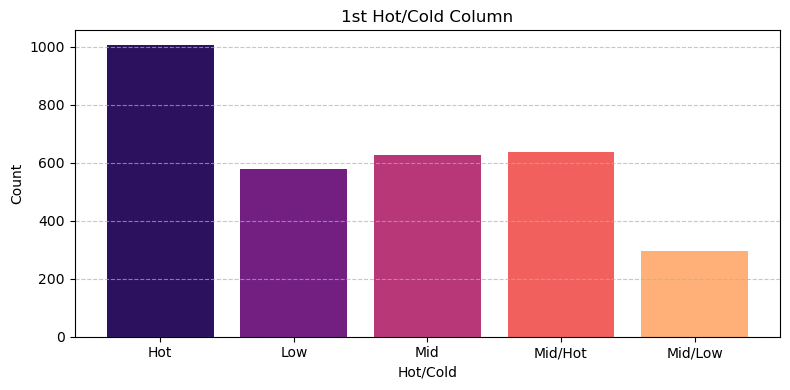

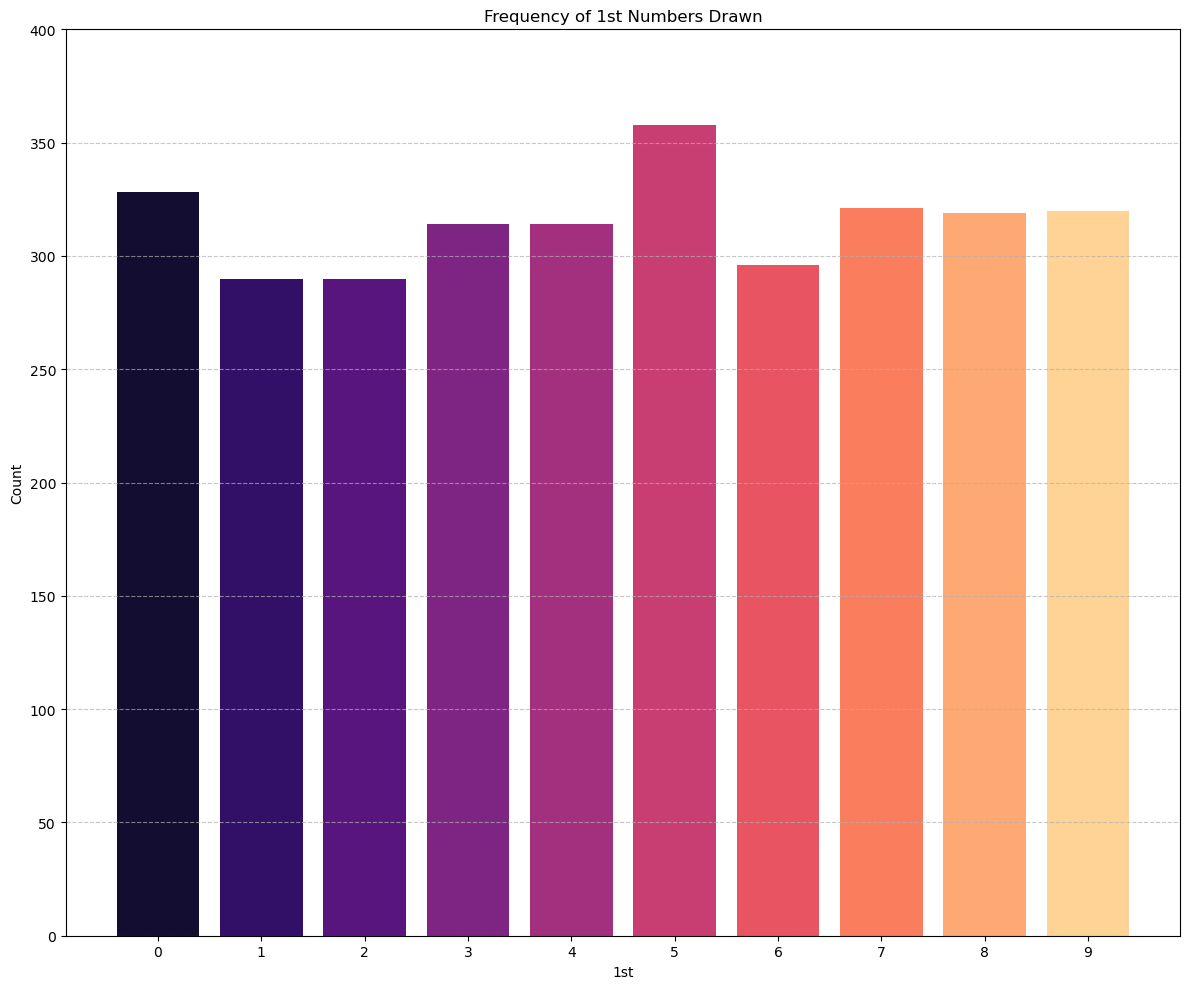

-----------------------------------

1st Category Breakdown:
Hot: [0, 5, 7]
Mid/Hot: [8, 9]
Mid: [3, 4]
Mid/Low: [6]
Low: [1, 2]
-----------------------------------
     Count  Percentage
1st                   
5      358   11.365079
0      328   10.412698
7      321   10.190476
9      320   10.158730
8      319   10.126984
4      314    9.968254
3      314    9.968254
6      296    9.396825
1      290    9.206349
2      290    9.206349


In [14]:
count_1st = data_HC_chart['1st_H/C'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count_1st))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_1st.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('1st Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count1st_values = data_HC['1st'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count1st_values))
plt.figure(figsize=(12, 10))

for i, (index, value) in enumerate(count1st_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('1st')
plt.ylabel('Count')
plt.xticks(count1st_values.index)
plt.yticks(range(0, int(count1st_values.max()) + 50, 50))
plt.title('Frequency of 1st Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#1st column breakdown
analyze_column(data_HC, '1st')

#values and %
number_columns = ['1st']
all_numbers = data_complete['1st']

overall_freq = all_numbers.value_counts()
overall_percent = all_numbers.value_counts(normalize=True) * 100

freq_data = pd.DataFrame({
    'Count': overall_freq,
    'Percentage': overall_percent
})

print(freq_data)

In [15]:
#1st unique numbers
unique_numbers = sorted(data_mon['1st'].unique())

counts_data = {}

for number in unique_numbers:
    counts_data[number] = {}
    for day, data in dataframes.items():
        counts_data[number][day] = data['1st'].value_counts().get(number, 0)

# Convert the dictionary to a list of lists for creating the DataFrame
table_data = []
for number in unique_numbers:
    row = [number] + [counts_data[number][day] for day in dataframes.keys()]
    table_data.append(row)

# Create the DataFrame
columns = ['Number'] + list(dataframes.keys())
data = pd.DataFrame(table_data, columns=columns)

print("Breakdown for Each Day's 1st Number")
print(data.to_string(index=False))

Breakdown for Each Day's 1st Number
 Number  Morn  Eve  Mon  Tues  Wed  Thur  Fri  Sat  Sun  Mon M  Mon E  Tues M  Tues E  Wed M  Wed E  Thur M  Thur E  Fri M  Fri E  Sat M  Sat E  Sun M  Sun E
      0   162  166   41    49   40    53   51   47   47     22     19      23      26     17     23      27      26     25     26     23     24     25     22
      1   153  137   43    46   36    43   33   45   44     20     23      31      15     18     18      20      23     18     15     22     23     24     20
      2   144  146   44    35   49    37   40   41   44     27     17      11      24     26     23      23      14     16     24     22     19     19     25
      3   160  154   47    49   51    44   43   41   39     23     24      26      23     27     24      24      20     21     22     16     25     23     16
      4   155  159   48    38   44    49   50   45   40     19     29      20      18     20     24      25      24     31     19     21     24     19     21
      5   181  1

In [16]:
result = []

for day, data in dataframes.items():
    counts = data['1st'].value_counts()
    if not counts.empty:
        max_count = counts.max()
        min_count = counts.min()        
        max_numbers = ','.join(str(x) for x in counts[counts == max_count].index)
        min_numbers = ','.join(str(x) for x in counts[counts == min_count].index)
    else:
        max_count = min_count = 0
        max_numbers = min_numbers = ''
    result.append([day, max_numbers, max_count, min_numbers, min_count])

summary_data = pd.DataFrame(
    result,
    columns=['Day', '1st Max', 'Max Count', '1st Min', 'Min Count']
)

print(summary_data)

       Day 1st Max  Max Count 1st Min  Min Count
0     Morn       5        181       2        144
1      Eve       5        177       1        137
2      Mon       7         53       5         40
3     Tues       5         56       2         35
4      Wed       9         54       1         36
5     Thur       5         60     8,6         36
6      Fri       5         56       1         33
7      Sat       5         50     3,2         41
8      Sun       5         56     9,3         39
9    Mon M       7         28     6,4         19
10   Mon E       4         29       5         16
11  Tues M     5,1         31       2         11
12  Tues E       7         28       1         15
13   Wed M       6         31       7         16
14   Wed E       9         28       6         16
15  Thur M     9,0         27       6         16
16  Thur E       5         35       2         14
17   Fri M       4         31       2         16
18   Fri E       5         33       1         15
19   Sat M       5  

### 2nd Hot/Cold and Frequency

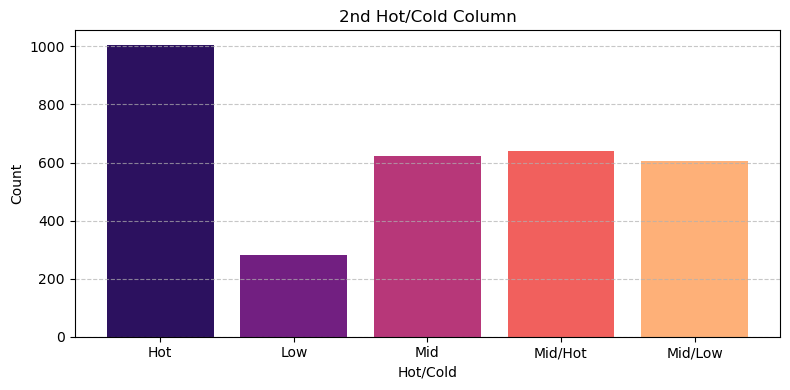

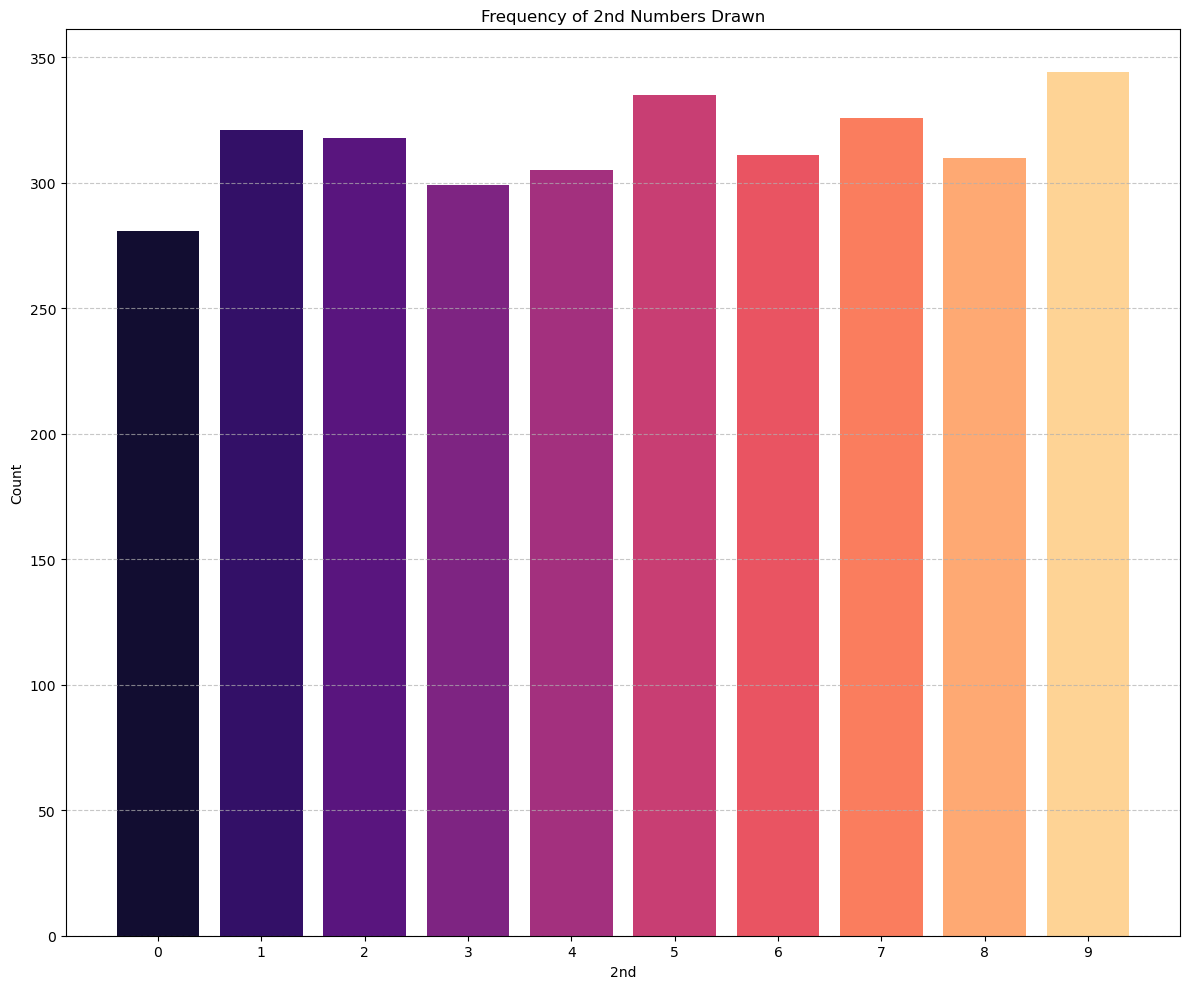

-----------------------------------

2nd Category Breakdown:
Hot: [5, 7, 9]
Mid/Hot: [1, 2]
Mid: [6, 8]
Mid/Low: [3, 4]
Low: [0]
-----------------------------------
     Count  Percentage
2nd                   
9      344   10.920635
5      335   10.634921
7      326   10.349206
1      321   10.190476
2      318   10.095238
6      311    9.873016
8      310    9.841270
4      305    9.682540
3      299    9.492063
0      281    8.920635


In [17]:
count_2nd = data_HC_chart['2nd_H/C'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count_2nd))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_2nd.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('2nd Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count2nd_values = data_HC['2nd'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count2nd_values))
plt.figure(figsize=(12, 10))

for i, (index, value) in enumerate(count2nd_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('2nd')
plt.ylabel('Count')
plt.xticks(count2nd_values.index)
plt.yticks(range(0, int(count2nd_values.max()) +50, 50))
plt.title('Frequency of 2nd Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#2nd Column Breakdown
analyze_column(data_HC, '2nd')

#values and %
number_columns = ['2nd']
all_numbers = data_complete['2nd']

overall_freq = all_numbers.value_counts()
overall_percent = all_numbers.value_counts(normalize=True) * 100

freq_data = pd.DataFrame({
    'Count': overall_freq,
    'Percentage': overall_percent
})

print(freq_data)

In [18]:
#2nd unique numbers
unique_numbers = sorted(data_mon['2nd'].unique())

counts_data = {}

for number in unique_numbers:
    counts_data[number] = {}
    for day, data in dataframes.items():
        counts_data[number][day] = data['2nd'].value_counts().get(number, 0)

# Convert the dictionary to a list of lists for creating the DataFrame
table_data = []
for number in unique_numbers:
    row = [number] + [counts_data[number][day] for day in dataframes.keys()]
    table_data.append(row)

# Create the DataFrame
columns = ['Number'] + list(dataframes.keys())
data = pd.DataFrame(table_data, columns=columns)

print("Breakdown for Each Day's 2nd Number")
print(data.to_string(index=False))

Breakdown for Each Day's 2nd Number
 Number  Morn  Eve  Mon  Tues  Wed  Thur  Fri  Sat  Sun  Mon M  Mon E  Tues M  Tues E  Wed M  Wed E  Thur M  Thur E  Fri M  Fri E  Sat M  Sat E  Sun M  Sun E
      0   137  144   45    32   41    41   29   44   49     17     28      16      16     21     20      23      18     15     14     22     22     23     26
      1   159  162   42    50   49    43   38   45   54     24     18      25      25     22     27      19      24     16     22     24     21     29     25
      2   188  130   45    51   43    50   55   36   38     23     22      32      19     26     17      29      21     36     19     22     14     20     18
      3   147  152   49    49   35    40   35   52   39     24     25      20      29     18     17      18      22     18     17     24     28     25     14
      4   150  155   50    43   52    36   39   45   40     24     26      23      20     26     26      19      17     20     19     22     23     16     24
      5   170  1

In [19]:
result = []

for day, data in dataframes.items():
    counts = data['2nd'].value_counts()
    if not counts.empty:
        max_count = counts.max()
        min_count = counts.min()        
        max_numbers = ','.join(str(x) for x in counts[counts == max_count].index)
        min_numbers = ','.join(str(x) for x in counts[counts == min_count].index)
    else:
        max_count = min_count = 0
        max_numbers = min_numbers = ''
    result.append([day, max_numbers, max_count, min_numbers, min_count])

summary_data = pd.DataFrame(
    result,
    columns=['Day', '2nd Max', 'Max Count', '2nd Min', 'Min Count']
)

print(summary_data)

       Day 2nd Max  Max Count 2nd Min  Min Count
0     Morn       2        188       0        137
1      Eve       9        176       2        130
2      Mon       4         50   5,1,8         42
3     Tues       2         51       0         32
4      Wed       5         55       3         35
5     Thur       6         60       4         36
6      Fri       5         60       0         29
7      Sat       3         52       6         34
8      Sun       9         55     8,2         38
9    Mon M     9,7         25     0,8         17
10   Mon E       0         28     1,5         18
11  Tues M       2         32       0         16
12  Tues E       3         29       0         16
13   Wed M     4,2         26       3         18
14   Wed E       5         30     2,3         17
15  Thur M       8         30       7         16
16  Thur E       6         34       4         17
17   Fri M       2         36       0         15
18   Fri E       5         34       0         14
19   Sat M       5  

### 3rd Hot/Cold and Frequency

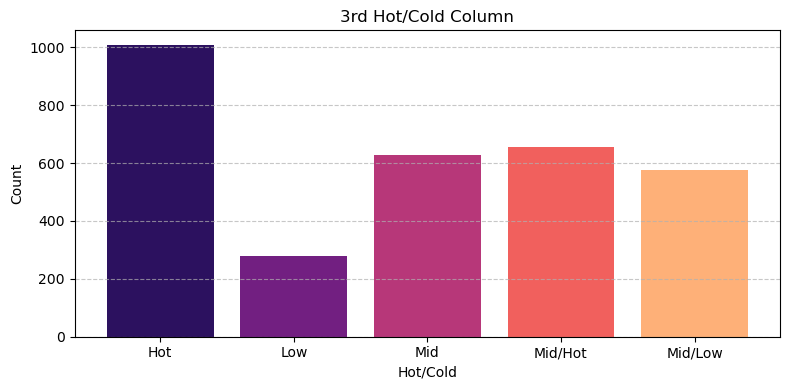

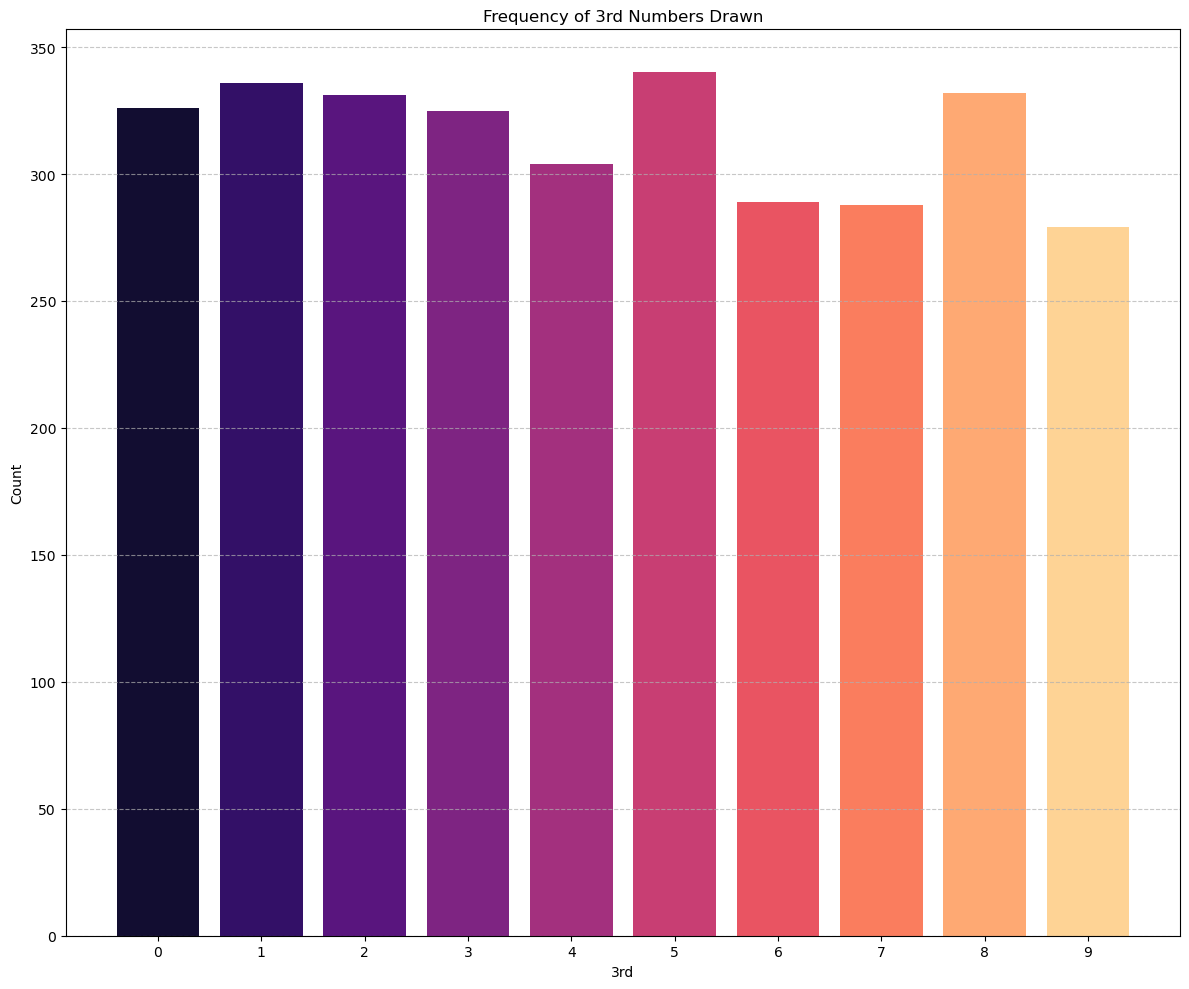

-----------------------------------

3rd Category Breakdown:
Hot: [1, 5, 8]
Mid/Hot: [0, 2]
Mid: [3, 4]
Mid/Low: [6, 7]
Low: [9]
-----------------------------------
     Count  Percentage
3rd                   
5      340   10.793651
1      336   10.666667
8      332   10.539683
2      331   10.507937
0      326   10.349206
3      325   10.317460
4      304    9.650794
6      289    9.174603
7      288    9.142857
9      279    8.857143


In [20]:
count_3rd = data_HC_chart['3rd_H/C'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count_3rd))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_3rd.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('3rd Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count3rd_values = data_HC['3rd'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count3rd_values))
plt.figure(figsize=(12, 10))

for i, (index, value) in enumerate(count3rd_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('3rd')
plt.ylabel('Count')
plt.xticks(count3rd_values.index)
plt.yticks(range(0, int(count3rd_values.max()) + 50, 50))
plt.title('Frequency of 3rd Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#3rd Column Breakdown
analyze_column(data_HC, '3rd')


#values and %
number_columns = ['3rd']
all_numbers = data_complete['3rd']

overall_freq = all_numbers.value_counts()
overall_percent = all_numbers.value_counts(normalize=True) * 100

freq_data = pd.DataFrame({
    'Count': overall_freq,
    'Percentage': overall_percent
})

print(freq_data)

In [21]:
#3rd unique numbers
unique_numbers = sorted(data_mon['3rd'].unique())

counts_data = {}

for number in unique_numbers:
    counts_data[number] = {}
    for day, data in dataframes.items():
        counts_data[number][day] = data['3rd'].value_counts().get(number, 0)

table_data = []
for number in unique_numbers:
    row = [number] + [counts_data[number][day] for day in dataframes.keys()]
    table_data.append(row)

columns = ['Number'] + list(dataframes.keys())
data = pd.DataFrame(table_data, columns=columns)

print("Breakdown for Each Day's 3rd Number")
print(data.to_string(index=False))

Breakdown for Each Day's 3rd Number
 Number  Morn  Eve  Mon  Tues  Wed  Thur  Fri  Sat  Sun  Mon M  Mon E  Tues M  Tues E  Wed M  Wed E  Thur M  Thur E  Fri M  Fri E  Sat M  Sat E  Sun M  Sun E
      0   164  162   56    46   48    46   43   45   42     24     32      28      18     21     27      29      17     22     21     19     26     21     21
      1   157  179   43    49   54    61   46   41   42     24     19      23      26     30     24      25      36     20     26     21     20     14     28
      2   169  162   46    45   45    45   44   53   53     20     26      23      22     23     22      23      22     21     23     29     24     30     23
      3   175  150   56    46   46    43   47   44   43     28     28      23      23     23     23      24      19     30     17     23     21     24     19
      4   148  156   51    43   36    43   48   39   44     26     25      15      28     19     17      21      22     26     22     22     17     19     25
      5   191  1

In [22]:
result = []

for day, data in dataframes.items():
    counts = data['3rd'].value_counts()
    if not counts.empty:
        max_count = counts.max()
        min_count = counts.min()        
        max_numbers = ','.join(str(x) for x in counts[counts == max_count].index)
        min_numbers = ','.join(str(x) for x in counts[counts == min_count].index)
    else:
        max_count = min_count = 0
        max_numbers = min_numbers = ''
    result.append([day, max_numbers, max_count, min_numbers, min_count])

summary_data = pd.DataFrame(
    result,
    columns=['Day', '3rd Max', 'Max Count', '3rd Min', 'Min Count']
)

print(summary_data)

       Day 3rd Max  Max Count 3rd Min  Min Count
0     Morn       5        191       7        129
1      Eve       1        179       9        131
2      Mon     0,3         56       6         36
3     Tues       5         51       7         37
4      Wed       1         54       7         34
5     Thur       1         61       9         32
6      Fri       5         55       9         32
7      Sat       5         54     9,6         38
8      Sun       8         55       6         38
9    Mon M       3         28       6         16
10   Mon E       0         32       5         16
11  Tues M       0         28       7         14
12  Tues E     8,4         28       6         15
13   Wed M       1         30       6         18
14   Wed E       0         27       7         15
15  Thur M       5         31     6,9         15
16  Thur E       1         36       8         16
17   Fri M       3         30       7         15
18   Fri E       7         28       9         15
19   Sat M       2  

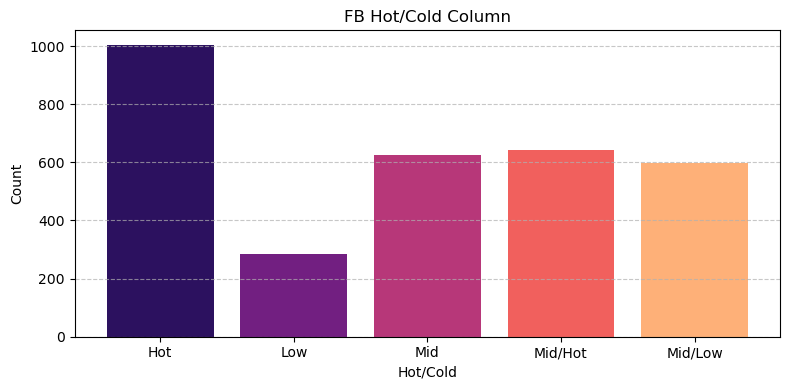

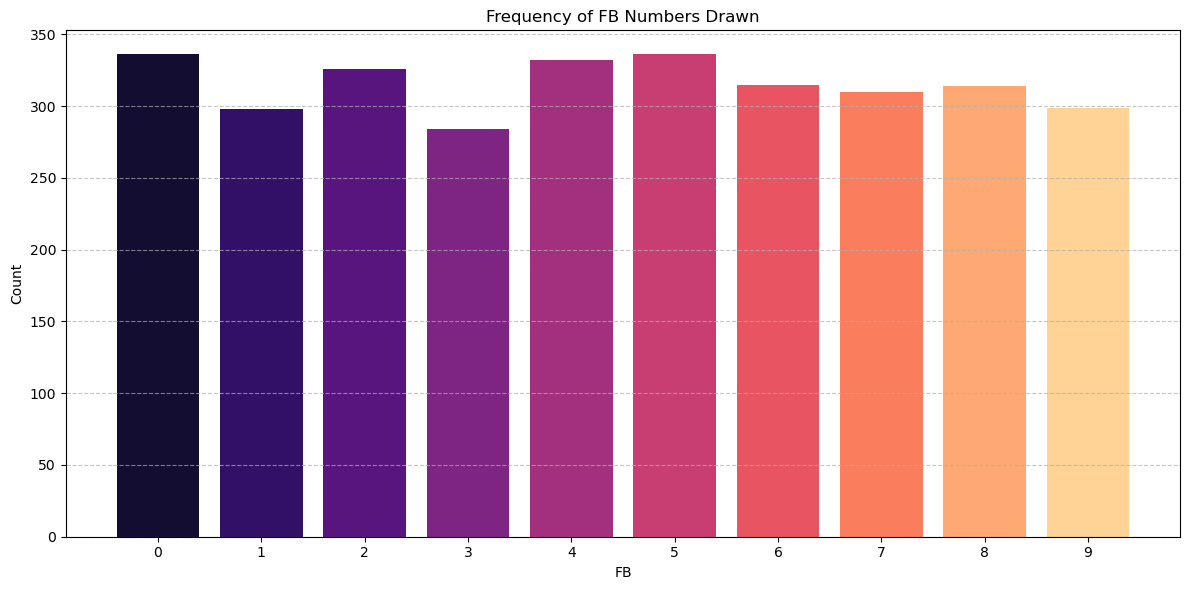

-----------------------------------

FB Category Breakdown:
Hot: [0, 4, 5]
Mid/Hot: [2, 6]
Mid: [7, 8]
Mid/Low: [1, 9]
Low: [3]
-----------------------------------
Breakdown for Each Day's Fire Ball Number
 Number  Mon  Tues  Wed  Thur  Fri  Sat  Sun  Mon M  Mon E  Tues M  Tues E  Wed M  Wed E  Thur M  Thur E  Fri M  Fri E  Sat M  Sat E  Sun M  Sun E
      0   51    56   55    45   37   52   40     20     31      25      31     21     34      21      24     23     14     25     27     20     20
      1   37    44   42    45   53   40   37     21     16      19      25     20     22      19      26     37     16     21     19     19     18
      2   43    54   46    52   44   41   46     20     23      21      33     25     21      25      27     26     18     19     22     16     30
      3   33    38   47    33   34   41   58     12     21      18      20     27     20      15      18     18     16     18     23     29     29
      4   53    50   49    37   51   44   48     30     23 

In [ ]:
##########################################################
######### Fire Ball number is picked for you #############
################### But cost extra #######################
######## here is a closer look into the Fire Ball ########
################### picked numbers #######################
##########################################################

count_FB = data_HC_chart['FB_H/C'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(count_FB))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_FB.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('FB Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


countFB_values = data_HC['FB'].value_counts().sort_index()
palette = sns.color_palette('magma', n_colors=len(countFB_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(countFB_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('FB')
plt.ylabel('Count')
plt.xticks(countFB_values.index)
plt.title('Frequency of FB Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, 'FB')

dataframes = {
    'Mon': data_mon,
    'Tues': data_tues,
    'Wed': data_wed,
    'Thur': data_thur,
    'Fri': data_fri,
    'Sat': data_sat,
    'Sun': data_sun,
    'Mon M': data_mon_M,
    'Mon E': data_mon_E,
    'Tues M': data_tues_M,
    'Tues E': data_tues_E,
    'Wed M': data_wed_M,
    'Wed E': data_wed_E,
    'Thur M': data_thur_M,
    'Thur E': data_thur_E,
    'Fri M': data_fri_M,
    'Fri E': data_fri_E,
    'Sat M': data_sat_M,
    'Sat E': data_sat_E,
    'Sun M': data_sun_M,
    'Sun E': data_sun_E
        
}

unique_numbers = sorted(data_mon['FB'].unique())

counts_data = {}

for number in unique_numbers:
    counts_data[number] = {}
    for day, data in dataframes.items():
        counts_data[number][day] = data['FB'].value_counts().get(number, 0)

table_data = []
for number in unique_numbers:
    row = [number] + [counts_data[number][day] for day in dataframes.keys()]
    table_data.append(row)

columns = ['Number'] + list(dataframes.keys())
data = pd.DataFrame(table_data, columns=columns)

print("Breakdown for Each Day's Fire Ball Number")
print(data.to_string(index=False))

## <span style= "color:red;">**Gameplay Number Generation**</span> 


In [24]:
#Datasets that numbers will generate through
datasets = [
    ('Complete', data_complete),
    ('Monday', data_mon),
    ('Tuesday', data_tues),
    ('Wednesday', data_wed),
    ('Thursday', data_thur),
    ('Friday', data_fri),
    ('Saturday', data_sat),
    ('Sunday', data_sun),
    ('Monday M', data_mon_M),
    ('Monday E', data_mon_E),
    ('Tuesday M', data_tues_M),
    ('Tuesday E', data_tues_E),
    ('Wednesday M', data_wed_M),
    ('Wednesday E', data_wed_E),
    ('Thursday M', data_thur_M),
    ('Thursday E', data_thur_E),
    ('Friday M', data_fri_M),
    ('Friday E', data_fri_E),
    ('Saturday M', data_sat_M),
    ('Saturday E', data_sat_E),
    ('Sunday M', data_sun_M),
    ('Sunday E', data_sun_E)
]

### **Best Transition** 🦩

In [25]:
class LotteryAnalyzer:
    def __init__(self, data_complete, name):
        self.data_complete = data_complete
        self.name = name
        self.data_complete_hot_cold = None
        self.transition_probs = {}
        self.hot_cold_probs = {}
        self.number_columns = ['1st', '2nd', '3rd']
        self.valid_ranges = {
            "1st": (0, 9),
            "2nd": (0, 9),
            "3rd": (0, 9)            
        }  

    def best_assign_HC(self):
        self.data_complete_hot_cold = self.data_complete.copy()
        for col in self.number_columns:
            self.data_complete_hot_cold[f'{col}_H/C'] = self._best_assign_HC_column(self.data_complete_hot_cold[col])

    def _best_assign_HC_column(self, series):
        counts = series.value_counts()
        percentiles = counts.rank(pct=True)
        def assign_category(x):
            p = percentiles[x] * 100  
            if p >= 85:
                return 'Hot'
            elif p >= 70:
                return 'Mid/Hot'
            elif p >= 55:
                return 'Mid'
            elif p >= 40:
                return 'Mid/Low'
            else:
                return 'Cold'
        return series.map(assign_category) #transitioned to 5 categories instead of 3

    def calculate_transition_probs(self):
        for column in self.number_columns:
            self.transition_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, column)
            self.hot_cold_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, f'{column}_H/C')

    def _calculate_transition_prob(self, data_complete, column):
        transitions = data_complete[column].shift().groupby(data_complete[column]).value_counts(normalize=True).unstack()
        return transitions.fillna(0)

    def generate_gameplay_numbers(self):
        gameplay_numbers = []
        previous_number = None
        for column in self.number_columns:
            best_transition = self._get_best_transition(self.hot_cold_probs[column], previous_number)
            selected_number = self._select_number(column, best_transition, gameplay_numbers)
            gameplay_numbers.append(selected_number)
            previous_number = best_transition
        return gameplay_numbers

    def _get_best_transition(self, transition_matrix, previous_number=None):
        if isinstance(transition_matrix, pd.Series):
            return transition_matrix.idxmax()
        elif previous_number is None:
            return transition_matrix.mean().idxmax()
        else:
            return transition_matrix.loc[previous_number].idxmax()

    def _select_number(self, column, best_transition, gameplay_numbers):    
        available_numbers = self.data_complete_hot_cold[
            (self.data_complete_hot_cold[f'{column}_H/C'] == best_transition) &
            (self.data_complete_hot_cold[column] >= self.valid_ranges[column][0]) &
            (self.data_complete_hot_cold[column] <= self.valid_ranges[column][1])
        ][column].unique()
        
        if len(available_numbers) == 0:
            available_numbers = list(range(
                self.valid_ranges[column][0], 
                self.valid_ranges[column][1] + 1
            ))       
        return random.choice(available_numbers)

In [26]:
analyzers = {}

for data_name, data in datasets:
    analyzer = LotteryAnalyzer(data, data_name)
    analyzer.best_assign_HC()
    analyzer.calculate_transition_probs()
    analyzers[data_name] = analyzer

print("Best Transition Gameplay Numbers")
results = []
for name, analyzer in analyzers.items():
    gameplay_set = analyzer.generate_gameplay_numbers()
    clean_numbers = [int(x) for x in gameplay_set]
    print(f"{name}:", clean_numbers)
    results.append([1, name] + clean_numbers)

os.makedirs('Predicted', exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'Predicted/best_pick3_numbers_{timestamp}.csv'

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Round', 'Dataset', 'Num1', 'Num2', 'Num3'])
    writer.writerows(results)

print(f"\nSaved predictions to {filename}")

Best Transition Gameplay Numbers
Complete: [2, 0, 7]
Monday: [4, 2, 3]
Tuesday: [5, 6, 4]
Wednesday: [5, 0, 4]
Thursday: [5, 6, 3]
Friday: [6, 6, 6]
Saturday: [3, 5, 5]
Sunday: [9, 1, 5]
Monday M: [6, 5, 8]
Monday E: [4, 1, 3]
Tuesday M: [2, 1, 3]
Tuesday E: [4, 6, 8]
Wednesday M: [6, 2, 9]
Wednesday E: [4, 6, 5]
Thursday M: [6, 7, 8]
Thursday E: [6, 5, 6]
Friday M: [7, 2, 8]
Friday E: [8, 2, 9]
Saturday M: [6, 9, 6]
Saturday E: [0, 1, 8]
Sunday M: [4, 1, 5]
Sunday E: [5, 9, 9]

Saved predictions to Predicted/best_pick3_numbers_20250512_2121.csv


### **Worst Transition** 🦩

In [27]:
class LotteryAnalyzer:
    def __init__(self, data_complete, name):
        self.data_complete = data_complete
        self.name = name
        self.data_complete_hot_cold = None
        self.transition_probs = {}
        self.hot_cold_probs = {}
        self.number_columns = ['1st', '2nd', '3rd']
        self.valid_ranges = {
            "1st": (0, 9),
            "2nd": (0, 9),
            "3rd": (0, 9)            
        }  

    def best_assign_HC(self):
        self.data_complete_hot_cold = self.data_complete.copy()
        for col in self.number_columns:
            self.data_complete_hot_cold[f'{col}_H/C'] = self._best_assign_HC_column(self.data_complete_hot_cold[col])

    def _best_assign_HC_column(self, series):
        counts = series.value_counts()
        percentiles = counts.rank(pct=True)
        def assign_category(x):
            p = percentiles[x] * 100  
            if p >= 85:
                return 'Hot'
            elif p >= 70:
                return 'Mid/Hot'
            elif p >= 55:
                return 'Mid'
            elif p >= 40:
                return 'Mid/Low'
            else:
                return 'Cold'
        return series.map(assign_category)

    def calculate_transition_probs(self):
        for column in self.number_columns:
            self.transition_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, column)
            self.hot_cold_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, f'{column}_H/C')

    def _calculate_transition_prob(self, data_complete, column):
        transitions = data_complete[column].shift().groupby(data_complete[column]).value_counts(normalize=True).unstack()
        return transitions.fillna(0)
    
    def _get_worst_transition(self, transition_matrix, previous_number=None):
        if isinstance(transition_matrix, pd.Series):
            return transition_matrix.idxmin()
        elif previous_number is None:
            return transition_matrix.mean().idxmin()
        else:        
            if previous_number not in transition_matrix.index:            
                return transition_matrix.mean().idxmin()
            row = transition_matrix.loc[previous_number]
            nonzero = row[row > 0]
            if not nonzero.empty:
                return nonzero.idxmin()
            else:
                return row.idxmin()
    
    def generate_gameplay_numbers(self):
        gameplay_numbers = []
        previous_number = None
        for column in self.number_columns:
            worst_transition = self._get_worst_transition(self.hot_cold_probs[column], previous_number)
            selected_number = self._select_number(column, worst_transition, gameplay_numbers)
            gameplay_numbers.append(selected_number)
            previous_number = worst_transition
        return gameplay_numbers

    def _select_number(self, column, transition_state, gameplay_numbers):
        available_numbers = self.data_complete_hot_cold[
            (self.data_complete_hot_cold[f'{column}_H/C'] == transition_state) & 
            (self.data_complete_hot_cold[column] >= self.valid_ranges[column][0]) & 
            (self.data_complete_hot_cold[column] <= self.valid_ranges[column][1])
        ][column].unique()

        if len(available_numbers) == 0:
            available_numbers = list(range(self.valid_ranges[column][0], self.valid_ranges[column][1] + 1))

        return random.choice(available_numbers)

In [28]:
analyzers = {}
results = []

print("Worst Transition Numbers")
for data_name, data in datasets:
    analyzer = LotteryAnalyzer(data, data_name)
    analyzer.best_assign_HC()
    analyzer.calculate_transition_probs()
    analyzers[data_name] = analyzer
    gameplay_set = analyzer.generate_gameplay_numbers()
    clean_numbers = [int(x) for x in gameplay_set]    
    print(f"{data_name}:", clean_numbers)
    results.append([1, data_name] + clean_numbers)

os.makedirs('Predicted', exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'Predicted/worst_transition_pick3_numbers_{timestamp}.csv'

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Round', 'Dataset', 'Num1', 'Num2', 'Num3'])
    writer.writerows(results)

print(f"\nSaved predictions to {filename}")

Worst Transition Numbers
Complete: [8, 2, 0]
Monday: [1, 6, 1]
Tuesday: [1, 3, 1]
Wednesday: [4, 2, 3]
Thursday: [1, 1, 0]
Friday: [9, 8, 2]
Saturday: [8, 7, 0]
Sunday: [7, 6, 3]
Monday M: [0, 9, 0]
Monday E: [9, 1, 2]
Tuesday M: [9, 1, 8]
Tuesday E: [3, 5, 2]
Wednesday M: [4, 8, 8]
Wednesday E: [0, 8, 8]
Thursday M: [3, 5, 3]
Thursday E: [9, 2, 7]
Friday M: [3, 7, 0]
Friday E: [3, 1, 2]
Saturday M: [0, 8, 5]
Saturday E: [1, 0, 3]
Sunday M: [3, 0, 4]
Sunday E: [0, 5, 2]

Saved predictions to Predicted/worst_transition_pick3_numbers_20250512_2121.csv
